<a href="https://colab.research.google.com/github/Pnwankwo2/M92/blob/jesse/project_1_10_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install the required libraries
!pip install prophet

In [4]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts

In [5]:
#Identify URL and create dataframe
# The correct encoding must be used to read the CSV
df = pd.read_csv("https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/D.N.B.US?format=csv",
                 encoding="ISO-8859-1",
                 index_col='TIME_PERIOD',
                 parse_dates=True)
df

,FREQ,EER_TYPE,EER_BASKET,REF_AREA,UNIT_MEASURE,TIME_FORMAT,COLLECTION,TITLE_TS,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK
TIME_PERIOD,,,,,,,,,,,,
1996-04-11,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.43,A,F,NaN
1996-04-12,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.37,A,F,NaN
1996-04-13,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-14,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-15,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.49,A,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),104.23,A,F,NaN
2024-09-28,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
2024-09-29,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN


In [6]:
df.shape

(10401, 12)

In [7]:
#. review the information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10401 entries, 1996-04-11 to 2024-10-01
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FREQ           10401 non-null  object 
 1   EER_TYPE       10401 non-null  object 
 2   EER_BASKET     10401 non-null  object 
 3   REF_AREA       10401 non-null  object 
 4   UNIT_MEASURE   10401 non-null  int64  
 5   TIME_FORMAT    0 non-null      float64
 6   COLLECTION     10401 non-null  object 
 7   TITLE_TS       10401 non-null  object 
 8   OBS_VALUE      7429 non-null   float64
 9   OBS_STATUS     10401 non-null  object 
 10  OBS_CONF       10401 non-null  object 
 11  OBS_PRE_BREAK  0 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.0+ MB


In [8]:
#Drop unwanted columns
df_filtered_columns = df[['OBS_VALUE']]
# df_filtered_columns

#Drop unwanted rows
df_filtered_rows = df_filtered_columns.dropna()
# df_filtered_rows

#rename columns and index
df_renamed = df_filtered_rows.rename(columns={'OBS_VALUE':'Exchange_Rate'},index={'TIME_PERIOD':'Date'})
df_renamed.index.name = 'Date'

# Check info and Datatypes
display(df_renamed.info())

# Show first and last 5 rows
display(df_renamed.head())
display(df_renamed.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7429 entries, 1996-04-11 to 2024-10-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange_Rate  7429 non-null   float64
dtypes: float64(1)
memory usage: 116.1 KB


None

,Exchange_Rate
Date,
1996-04-11,77.43
1996-04-12,77.37
1996-04-15,77.49
1996-04-16,77.41
1996-04-17,77.40


,Exchange_Rate
Date,
2024-09-25,104.29
2024-09-26,104.36
2024-09-27,104.23
2024-09-30,104.22
2024-10-01,104.70


In [9]:
# Apply Statistical Analysis

# Calculate the count, minimum value and maximum value of the exchange rate column
print("Exchange_Rate:")
print(f"The count is {df_renamed['Exchange_Rate'].count()}")
print(f"The minimum is {df_renamed['Exchange_Rate'].min()}")
print(f"The maximum is {df_renamed['Exchange_Rate'].max()}")

# Calculate the measure of central tendency

mean_numpy = np.mean(df_renamed['Exchange_Rate'])
print(f"The mean exchange rate is {mean_numpy}")

median_numpy = np.median(df_renamed['Exchange_Rate'])
print(f"The median exchange rate is {median_numpy}")

mode_scipy = sts.mode(df_renamed['Exchange_Rate'])
print(f"The mode exchange rate is {mode_scipy}")

print(f"The mean is {df_renamed['Exchange_Rate'].mean()}")

# Calculate variance and standard deviation using NumPy

std_numpy = np.std(df_renamed['Exchange_Rate'])
print(f"The standard deviation of the exchange rate is {std_numpy}")

variance_numpy = np.var(df_renamed['Exchange_Rate'])
print(f"The variance of the exchange rate is {variance_numpy}")

# Use pandas to find potential outliers by calculating the interquartile range (IQR)
Q1 = df_renamed['Exchange_Rate'].quantile(0.25)
median = df_renamed['Exchange_Rate'].quantile(0.5)
Q3 = df_renamed['Exchange_Rate'].quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of Exchange Rate is: {Q1}")
print(f"The upper quartile of Exchange Rate is: {Q3}")
print(f"The interquartile range of Exchange Rate is: {IQR}")


lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Exchange_Rate:
The count is 7429
The minimum is 73.92
The maximum is 110.37
The mean exchange rate is 90.55257369767129
The median exchange rate is 91.62
The mode exchange rate is ModeResult(mode=78.12, count=13)
The mean is 90.55257369767129
The standard deviation of the exchange rate is 8.790205513040572
The variance of the exchange rate is 77.26771296148887
The lower quartile of Exchange Rate is: 81.76
The upper quartile of Exchange Rate is: 97.7
The interquartile range of Exchange Rate is: 15.939999999999998
Values below 57.85000000000001 could be outliers.
Values above 121.61 could be outliers.


In [10]:
# Calculate z-scores using SciPy (z-score: how many standard deviations away from the mean the corresponding exhcange rate value is)

zscore = sts.zscore(df_renamed['Exchange_Rate'])
print(f"The z-score of the exchange rate is {zscore}")

The z-score of the exchange rate is Date
1996-04-11   -1.492863
1996-04-12   -1.499689
1996-04-15   -1.486037
1996-04-16   -1.495138
1996-04-17   -1.496276
                ...   
2024-09-25    1.562811
2024-09-26    1.570774
2024-09-27    1.555985
2024-09-30    1.554847
2024-10-01    1.609453
Name: Exchange_Rate, Length: 7429, dtype: float64


In [11]:
# add the mean, median, mode, variance, standard deviation, and z-scores to the DataFrame as new columns
# mean = average, median = middle value, mode = most frequent appearing exchange rate
# variance = how far exchange rates are from the mean, SD = square root of variance and is average disatance of each exchange rate from the mean
# higher SD indicates greater dispersion in the exchange rates

df_renamed.loc[:, 'mean'] = mean_numpy
df_renamed.loc[:, 'Median'] = median_numpy
df_renamed.loc[:, 'Variance'] = variance_numpy
df_renamed.loc[:, 'Standard_Deviation'] = std_numpy
df_renamed.loc[:, 'z_score'] = (df_renamed['Exchange_Rate'] - mean_numpy) / std_numpy

# Display the first and last five rows
display(df_renamed.head())
display(df_renamed.tail())

,Exchange_Rate,mean,Median,Variance,Standard_Deviation,z_score
Date,,,,,,
1996-04-11,77.43,90.552574,91.62,77.267713,8.790206,-1.492863
1996-04-12,77.37,90.552574,91.62,77.267713,8.790206,-1.499689
1996-04-15,77.49,90.552574,91.62,77.267713,8.790206,-1.486037
1996-04-16,77.41,90.552574,91.62,77.267713,8.790206,-1.495138
1996-04-17,77.40,90.552574,91.62,77.267713,8.790206,-1.496276


,Exchange_Rate,mean,Median,Variance,Standard_Deviation,z_score
Date,,,,,,
2024-09-25,104.29,90.552574,91.62,77.267713,8.790206,1.562811
2024-09-26,104.36,90.552574,91.62,77.267713,8.790206,1.570774
2024-09-27,104.23,90.552574,91.62,77.267713,8.790206,1.555985
2024-09-30,104.22,90.552574,91.62,77.267713,8.790206,1.554847
2024-10-01,104.70,90.552574,91.62,77.267713,8.790206,1.609453


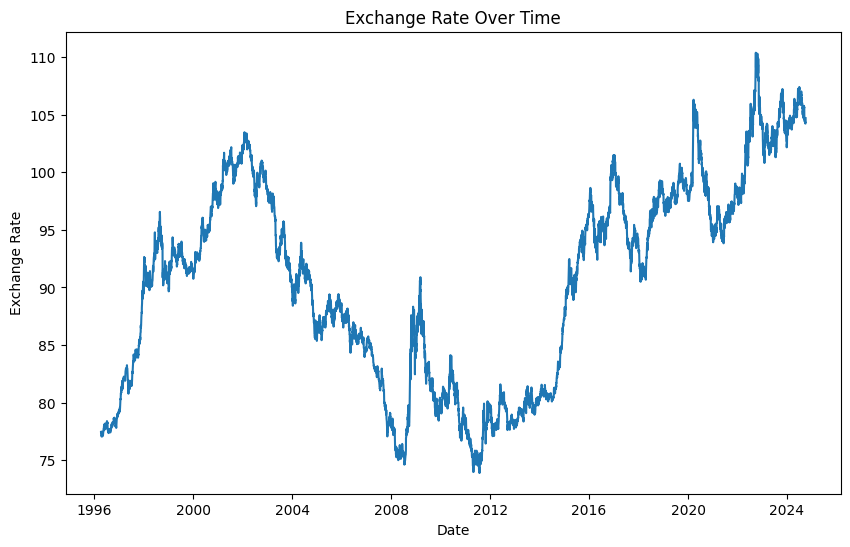

In [12]:
#exhange rate over time
plt.figure(figsize=(10,6))
plt.plot(df_renamed['Exchange_Rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


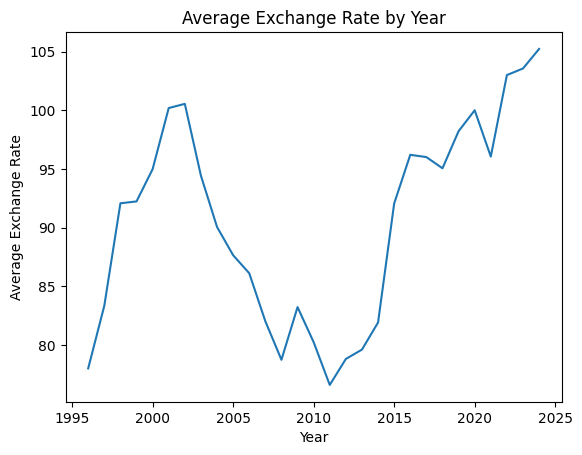

In [13]:
#average exchange rate by year
df_renamed['Year'] = df_renamed.index.year
average_exchange_rate_by_year = df_renamed.groupby('Year')['Exchange_Rate'].mean()
average_exchange_rate_by_year.plot(kind='line')
plt.title('Average Exchange Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Exchange Rate')
plt.show()
#

In [14]:
#average exchange rate by year and month
df_renamed['Month'] = df_renamed.index.month
average_exchange_rate_by_month = df_renamed.groupby(['Year', 'Month'])['Exchange_Rate'].mean()
average_exchange_rate_by_month.head(20)

Year  Month
1996  4        77.313571
      5        77.572609
      6        77.951500
      7        77.910435
      8        77.545000
      9        77.979048
      10       78.423043
      11       78.139524
      12       79.005455
1997  1        79.816087
      2        81.376500
      3        82.067619
      4        82.701818
      5        81.834545
      6        81.586667
      7        82.385217
      8        83.914286
      9        84.278182
      10       84.615652
      11       86.140000
Name: Exchange_Rate, dtype: float64

In [16]:

#drop Year and Month Columns
df_renamed_prophet = df_renamed.drop(['Year', 'Month'], axis=1)
df_renamed_prophet

#reset index
df_renamed_prophet = df_renamed_prophet.reset_index()
df_renamed_prophet

#rename columns
df_renamed_prophet = df_renamed_prophet.rename(columns={'Date':'ds', 'Exchange_Rate':'y'})
df_renamed_prophet

display(df_renamed_prophet.head())
display(df_renamed_prophet.tail())



,ds,y,mean,Median,Variance,Standard_Deviation,z_score
0,1996-04-11,77.43,90.552574,91.62,77.267713,8.790206,-1.492863
1,1996-04-12,77.37,90.552574,91.62,77.267713,8.790206,-1.499689
2,1996-04-15,77.49,90.552574,91.62,77.267713,8.790206,-1.486037
3,1996-04-16,77.41,90.552574,91.62,77.267713,8.790206,-1.495138
4,1996-04-17,77.40,90.552574,91.62,77.267713,8.790206,-1.496276


,ds,y,mean,Median,Variance,Standard_Deviation,z_score
7424,2024-09-25,104.29,90.552574,91.62,77.267713,8.790206,1.562811
7425,2024-09-26,104.36,90.552574,91.62,77.267713,8.790206,1.570774
7426,2024-09-27,104.23,90.552574,91.62,77.267713,8.790206,1.555985
7427,2024-09-30,104.22,90.552574,91.62,77.267713,8.790206,1.554847
7428,2024-10-01,104.70,90.552574,91.62,77.267713,8.790206,1.609453


In [17]:
#call prophet function
prophet_model = Prophet()

# Fit the time-series model.
prophet_model.fit(df_renamed_prophet)

# Make the predictions for the trend data using the df_renamed_prophet DataFrame
prophet_model_future = prophet_model.make_future_dataframe(periods=2, freq='Y')

prophet_model_future_forecast = prophet_model.predict(prophet_model_future)


# display(prophet_model_future.tail())

# Display the first five rows of the df_renamed_prophet DataFrame
prophet_model_future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
display(prophet_model_future_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qs7_p8b/b0f87zcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5qs7_p8b/xrpyk7kd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32318', 'data', 'file=/tmp/tmp5qs7_p8b/b0f87zcq.json', 'init=/tmp/tmp5qs7_p8b/xrpyk7kd.json', 'output', 'file=/tmp/tmp5qs7_p8b/prophet_modelb5pa1zax/prophet_model-20241007172136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-11,76.566980,73.836083,78.823975,76.566980,76.566980,-0.163952,-0.163952,-0.163952,-0.120922,-0.120922,-0.120922,-0.043030,-0.043030,-0.043030,0.0,0.0,0.0,76.403028
1,1996-04-12,76.579177,74.016907,78.715293,76.579177,76.579177,-0.163599,-0.163599,-0.163599,-0.111210,-0.111210,-0.111210,-0.052389,-0.052389,-0.052389,0.0,0.0,0.0,76.415578
2,1996-04-15,76.615766,73.993482,78.706078,76.615766,76.615766,-0.192368,-0.192368,-0.192368,-0.110872,-0.110872,-0.110872,-0.081496,-0.081496,-0.081496,0.0,0.0,0.0,76.423398
3,1996-04-16,76.627963,74.004989,78.780799,76.627963,76.627963,-0.203423,-0.203423,-0.203423,-0.112082,-0.112082,-0.112082,-0.091342,-0.091342,-0.091342,0.0,0.0,0.0,76.424539
4,1996-04-17,76.640159,74.034099,78.871418,76.640159,76.640159,-0.211530,-0.211530,-0.211530,-0.110415,-0.110415,-0.110415,-0.101115,-0.101115,-0.101115,0.0,0.0,0.0,76.428629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7426,2024-09-27,105.209109,102.720115,107.586706,105.209109,105.209109,-0.064869,-0.064869,-0.064869,-0.111210,-0.111210,-0.111210,0.046341,0.046341,0.046341,0.0,0.0,0.0,105.144241
7427,2024-09-30,105.221075,102.612736,107.518525,105.221075,105.221075,-0.033630,-0.033630,-0.033630,-0.110872,-0.110872,-0.110872,0.077242,0.077242,0.077242,0.0,0.0,0.0,105.187445
7428,2024-10-01,105.225063,102.831558,107.554799,105.225063,105.225063,-0.024997,-0.024997,-0.024997,-0.112082,-0.112082,-0.112082,0.087084,0.087084,0.087084,0.0,0.0,0.0,105.200066
7429,2024-12-31,105.588009,100.551517,109.756549,101.522976,109.599454,-0.279996,-0.279996,-0.279996,-0.112082,-0.112082,-0.112082,-0.167914,-0.167914,-0.167914,0.0,0.0,0.0,105.308013


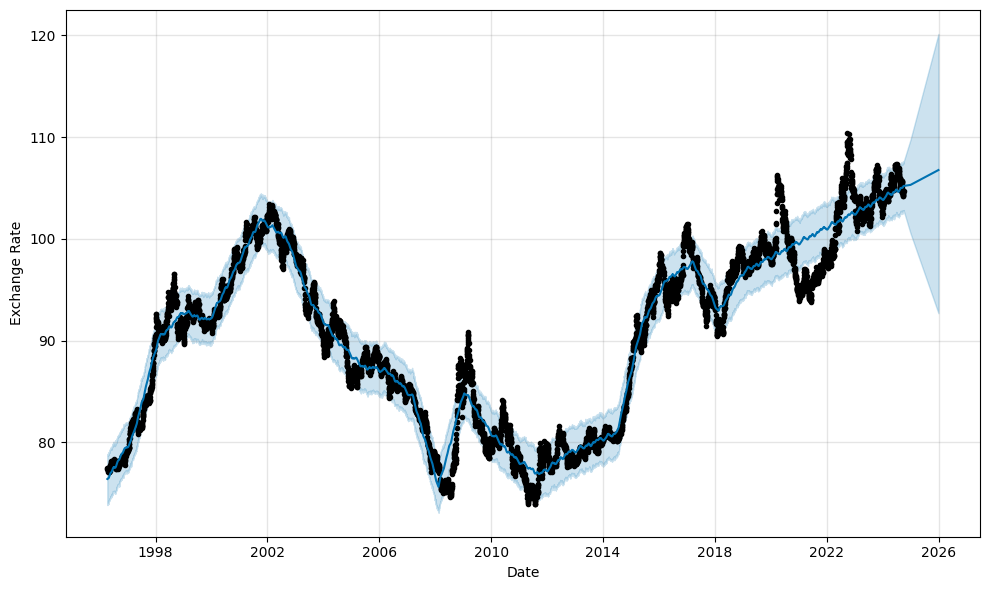

In [18]:
#plot the predictions and show each year on the x axis
prophet_model.plot(prophet_model_future_forecast)

# Set custom labels for the axes
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

plt.show()


In [19]:
# Make the predictions for the trend data using the df_renamed_prophet DataFrame
prophet_model_future_days = prophet_model.make_future_dataframe(periods=100, freq='D')

prophet_model_future_forecast_days = prophet_model.predict(prophet_model_future_days)


# display(prophet_model_future.tail())

# Display the first five rows of the df_renamed_prophet DataFrame
prophet_model_future_forecast_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
display(prophet_model_future_forecast_days)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-11,76.566980,74.082497,78.877679,76.566980,76.566980,-0.163952,-0.163952,-0.163952,-0.120922,-0.120922,-0.120922,-0.043030,-0.043030,-0.043030,0.0,0.0,0.0,76.403028
1,1996-04-12,76.579177,74.069193,78.688986,76.579177,76.579177,-0.163599,-0.163599,-0.163599,-0.111210,-0.111210,-0.111210,-0.052389,-0.052389,-0.052389,0.0,0.0,0.0,76.415578
2,1996-04-15,76.615766,73.920755,78.668702,76.615766,76.615766,-0.192368,-0.192368,-0.192368,-0.110872,-0.110872,-0.110872,-0.081496,-0.081496,-0.081496,0.0,0.0,0.0,76.423398
3,1996-04-16,76.627963,74.070493,78.709387,76.627963,76.627963,-0.203423,-0.203423,-0.203423,-0.112082,-0.112082,-0.112082,-0.091342,-0.091342,-0.091342,0.0,0.0,0.0,76.424539
4,1996-04-17,76.640159,74.239140,78.932500,76.640159,76.640159,-0.211530,-0.211530,-0.211530,-0.110415,-0.110415,-0.110415,-0.101115,-0.101115,-0.101115,0.0,0.0,0.0,76.428629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7524,2025-01-05,105.607951,103.211435,108.128076,105.607951,105.623910,0.073083,0.073083,0.073083,0.282751,0.282751,0.282751,-0.209667,-0.209667,-0.209667,0.0,0.0,0.0,105.681034
7525,2025-01-06,105.611939,102.730749,107.812595,105.611939,105.625326,-0.325951,-0.325951,-0.325951,-0.110872,-0.110872,-0.110872,-0.215079,-0.215079,-0.215079,0.0,0.0,0.0,105.285988
7526,2025-01-07,105.615928,102.753422,107.937038,105.614607,105.630037,-0.331411,-0.331411,-0.331411,-0.112082,-0.112082,-0.112082,-0.219329,-0.219329,-0.219329,0.0,0.0,0.0,105.284517
7527,2025-01-08,105.619916,102.795722,107.605358,105.617504,105.635227,-0.332784,-0.332784,-0.332784,-0.110415,-0.110415,-0.110415,-0.222369,-0.222369,-0.222369,0.0,0.0,0.0,105.287132


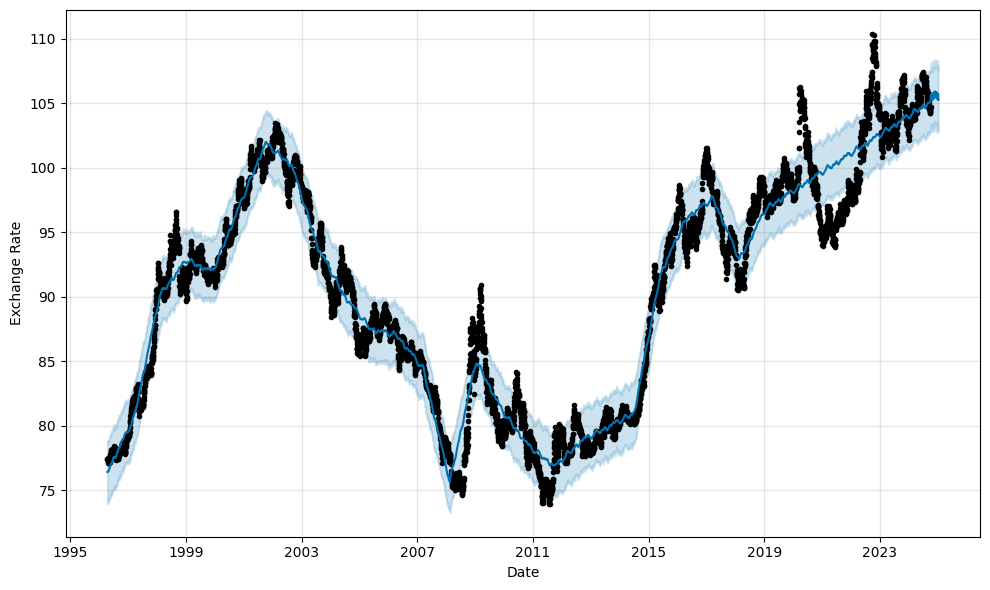

In [20]:
#plot the predictions and show each year on the x axis
prophet_model.plot(prophet_model_future_forecast_days)

# Set custom labels for the axes
plt.xlabel('Date')
plt.ylabel('Exchange Rate')


plt.show()
#rename

In [ ]:
# Step 1: Calculate the yearly average exchange rate
yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').mean()

# Step 2: Filter data to only include September and October for each year
oct_data = df_renamed[(df_renamed.index.month == 10)]

# Step 3: Filter data to only include November and December for each year
nov_data = df_renamed[(df_renamed.index.month ==11)]

# Step 4: Calculate the average exchange rate for September and October for each year
oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').mean()

# Step 5: Calculate the average exchange rate for November and December for each year
nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').mean()

# Step 6: Combine both results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Yearly Avg Exchange Rate': yearly_avg_exchange_rate,
    'Oct Avg Exchange Rate': oct_avg_exchange_rate,
    'Nov Avg Exchange Rate': nov_avg_exchange_rate
})

# Display the comparison
print(comparison_df)

            Yearly Avg Exchange Rate  Oct Avg Exchange Rate  \
Date                                                          
1996-12-31                 78.009841              78.423043   
1997-12-31                 83.346054              84.615652   
1998-12-31                 92.076284              91.510909   
1999-12-31                 92.234828              91.359048   
2000-12-31                 94.981577              97.729091   
2001-12-31                100.189655             100.776957   
2002-12-31                100.546475             100.624348   
2003-12-31                 94.429119              92.114783   
2004-12-31                 90.060534              89.616667   
2005-12-31                 87.650462              88.360476   
2006-12-31                 86.117885              85.980000   
2007-12-31                 82.023831              79.242609   
2008-12-31                 78.742824              84.067391   
2009-12-31                 83.231916              79.66

<ipython-input-29-3110b43cfa50>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').mean()
<ipython-input-29-3110b43cfa50>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').mean()
<ipython-input-29-3110b43cfa50>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').mean()


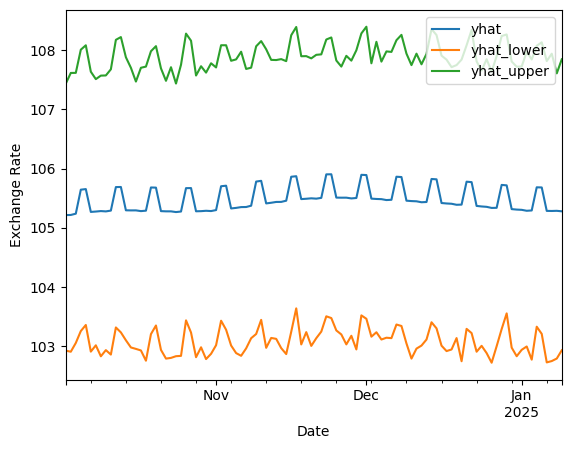

In [23]:
prophet_model_future_forecast_days

# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast = prophet_model_future_forecast_days.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-100:,:].plot()

# Set custom labels for the axes
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

# Show the plot
plt.show()



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

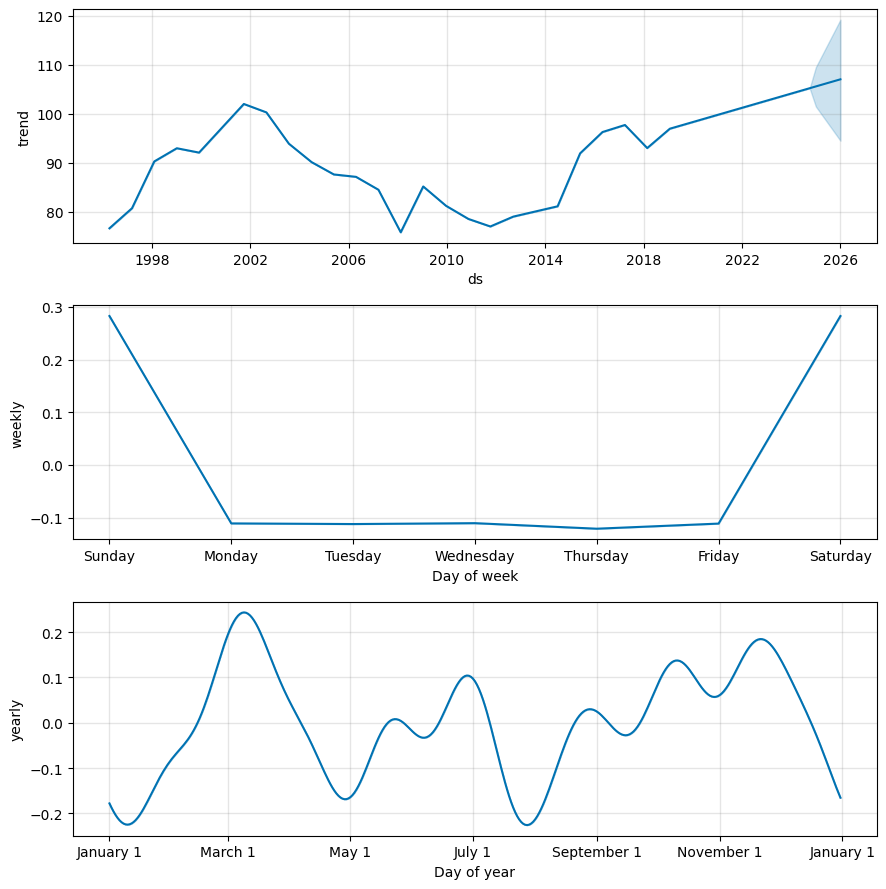

In [ ]:
fiqure = prophet_model.plot_components(prophet_model_future_forecast)

In [ ]:
# Step 1: Calculate the yearly average exchange rate standard deviation
yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').std()

# Step 2: Filter data to only include September and October standard deviation for each year
oct_data = df_renamed[(df_renamed.index.month == 10)]

# Step 3: Filter data to only include November and December standard deviation for each year
nov_data = df_renamed[(df_renamed.index.month ==11)]

# Step 4: Calculate the average exchange rate for September and October standard deviation for each year
oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').std()

# Step 5: Calculate the average exchange rate for November and December standard deviation for each year
nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').std()

# Step 6: Combine both results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Yearly Avg Exchange Rate standard deviation': yearly_avg_exchange_rate,
    'Oct Avg Exchange Rate standard deviation': oct_avg_exchange_rate,
    'Nov Avg Exchange Rate standard deviation': nov_avg_exchange_rate
})

# Display the comparison
print(comparison_df)

            Yearly Avg Exchange Rate standard deviation  \
Date                                                      
1996-12-31                                     0.516576   
1997-12-31                                     2.512258   
1998-12-31                                     1.623681   
1999-12-31                                     0.867986   
2000-12-31                                     2.182142   
2001-12-31                                     1.269009   
2002-12-31                                     1.572128   
2003-12-31                                     2.406314   
2004-12-31                                     1.906284   
2005-12-31                                     0.937886   
2006-12-31                                     1.023994   
2007-12-31                                     2.405016   
2008-12-31                                     4.068958   
2009-12-31                                     3.278641   
2010-12-31                                     1.634516 

<ipython-input-38-41c901afd6bb>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').std()
<ipython-input-38-41c901afd6bb>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').std()
<ipython-input-38-41c901afd6bb>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').std()


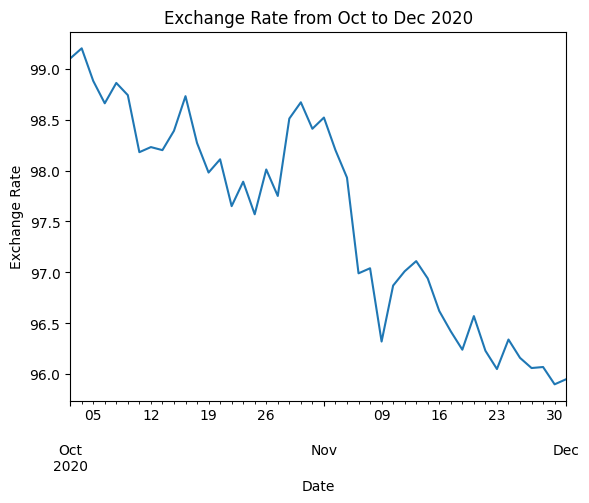

In [ ]:
# Filter the DataFrame to only include data between "2020-10-01" and "2020-12-01"
df_filtered = df_renamed.loc["2020-10-01" : "2020-12-01", 'Exchange_Rate']

# Plot the filtered data (y-axis: Exchange_Rate, x-axis: Date)
df_filtered.plot(title='Exchange Rate from Oct to Dec 2020', ylabel='Exchange Rate', xlabel='Date')

# Show the plot
plt.show()

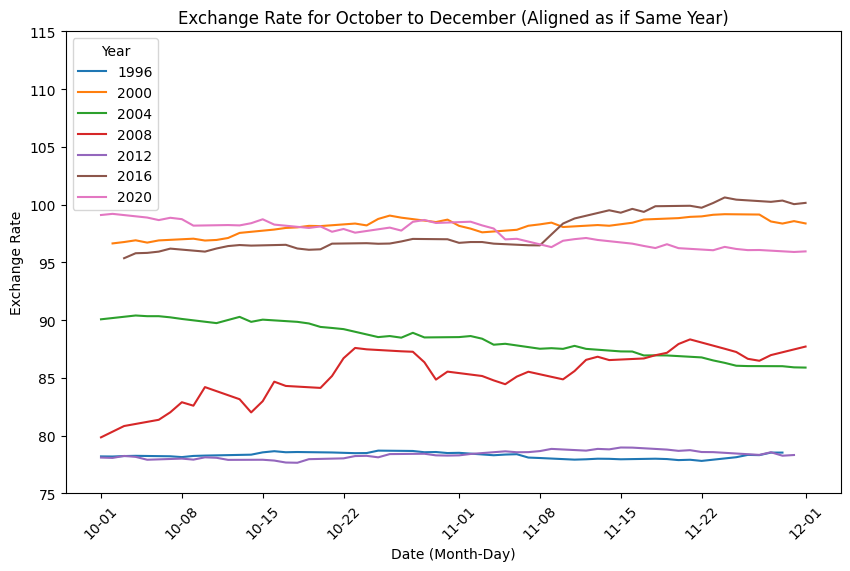

In [28]:
# List of years you want to plot
years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each year and plot the data
for year in years:
    # Filter the DataFrame for each year from October to December
    df_year = df_renamed.loc[f"{year}-10-01" : f"{year}-12-01", 'Exchange_Rate']

    # Create a new index where we reset the year to be the same for all (e.g., 2020)
    df_year.index = df_year.index.map(lambda x: x.replace(year=2020))

    # Plot the data, labeling it by the actual year
    plt.plot(df_year.index, df_year.values, label=f'{year}')

# Add title and labels
plt.title('Exchange Rate for October to December (Aligned as if Same Year)')
plt.ylabel('Exchange Rate')
plt.xlabel('Date (Month-Day)')

# Format the x-axis labels to show just the month and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish lines by year
plt.legend(title="Year")

# Add y-axis limits
plt.ylim(75, 115)

# Show the plot
plt.show()

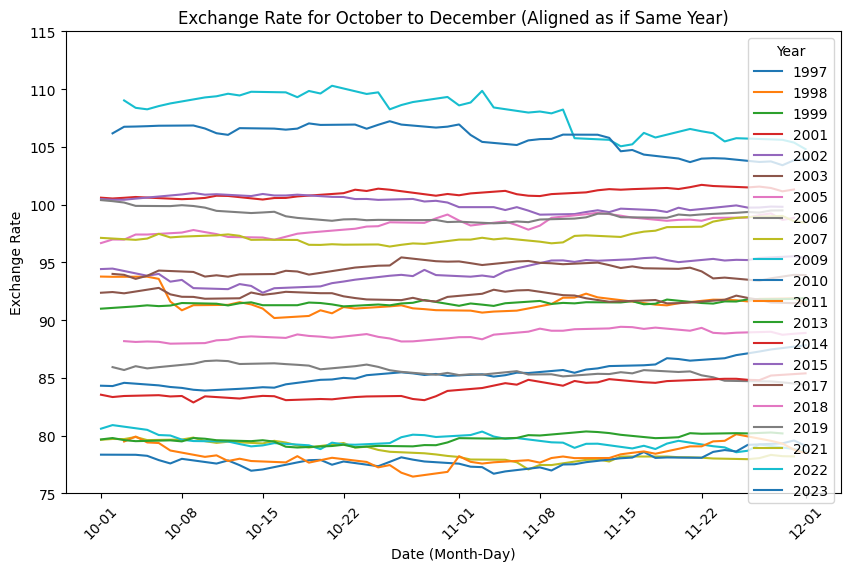

In [29]:
# List of years you want to plot
years = [1997, 1998, 1999, 2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2017, 2018, 2019, 2021, 2022, 2023]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each year and plot the data
for year in years:
    # Filter the DataFrame for each year from October to December
    df_year = df_renamed.loc[f"{year}-10-01" : f"{year}-12-01", 'Exchange_Rate']

    # Create a new index where we reset the year to be the same for all (e.g., 2020)
    df_year.index = df_year.index.map(lambda x: x.replace(year=2020))

    # Plot the data, labeling it by the actual year
    plt.plot(df_year.index, df_year.values, label=f'{year}')

# Add title and labels
plt.title('Exchange Rate for October to December (Aligned as if Same Year)')
plt.ylabel('Exchange Rate')
plt.xlabel('Date (Month-Day)')

# Format the x-axis labels to show just the month and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish lines by year
plt.legend(title="Year")
# Add y-axis limits
plt.ylim(75, 115)

# Show the plot
plt.show()

In [30]:
# List of years you want to plot
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]
non_election_years = [1997, 1998, 1999, 2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2017, 2018, 2019, 2021, 2022, 2023]


#average the exchange rate for election years by year
df_election_years = df_renamed[df_renamed.index.year.isin(election_years)]
# df_election_years

#remove anything not in october or november
df_election_years = df_election_years[(df_election_years.index.month == 10) | (df_election_years.index.month == 11)]
# df_election_years


#find the mean of the dataset
mean_election_years = df_election_years.groupby(df_election_years.index.year)['Exchange_Rate'].mean()
display(mean_election_years)



#average the exchange rate for election years by year
df_non_election_years = df_renamed[df_renamed.index.year.isin(non_election_years)]
# df_election_years

#remove anything not in october or november
df_non_election_years = df_non_election_years[(df_non_election_years.index.month == 10) | (df_non_election_years.index.month == 11)]
# df_election_years


#find the mean of the dataset
mean_non_election_years = df_non_election_years.groupby(df_non_election_years.index.year)['Exchange_Rate'].mean()
display(mean_non_election_years)



,Exchange_Rate
Date,
1996,78.287727
2000,98.090682
2004,88.375814
2008,85.137209
2012,78.334444
2016,97.589767
2020,97.571628


,Exchange_Rate
Date,
1997,85.324651
1998,91.496512
1999,91.445116
2001,101.000000
2002,100.129545
2003,92.038605
2005,88.688605
2006,85.587045
2007,78.611778


(60.0, 100.0)

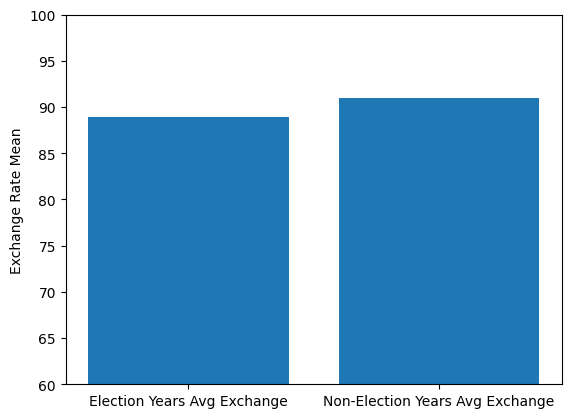

In [32]:
mean_non_election_years = df_non_election_years['Exchange_Rate'].mean()
mean_election_years = df_election_years['Exchange_Rate'].mean()

plot_data = {
    'Election Years Avg Exchange': mean_election_years,
    'Non-Election Years Avg Exchange': mean_non_election_years
}

# Set custom labels for the axes
# plt.xlabel('Date')
plt.ylabel('Exchange Rate Mean')

plt.bar(plot_data.keys(), plot_data.values())

#make my y axis range from 60 to 100
plt.ylim(60, 100)

In [ ]:

# Define the election years from 1996 to 2023
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]
# election_years = [1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]

# Filter for October 1st to November 30th in the Date column
df_filtered = df_renamed[(df_renamed.index.strftime('%m-%d') >= '10-01') &
                         (df_renamed.index.strftime('%m-%d') <= '11-30')]

# Add a column to identify whether the year is an election year or not
df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)

# Group by 'Election_Year' and calculate the standard deviation for each group
std_dev_by_group = df_filtered.groupby('Election_Year')['Exchange_Rate'].std()

# Display the standard deviations for election years and non-election years
std_dev_by_group

<ipython-input-48-6c7aa9ca668a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)


,Exchange_Rate
Election_Year,
False,9.128353
True,8.366186


<ipython-input-34-922d05d3d805>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)


,Exchange_Rate
Election_Year,
False,83.440438
True,69.993064


<Axes: title={'center': 'Variance in Exchange Rate for Election vs Non-Election Years'}, xlabel='Election_Year', ylabel='Variance in Exchange Rate'>

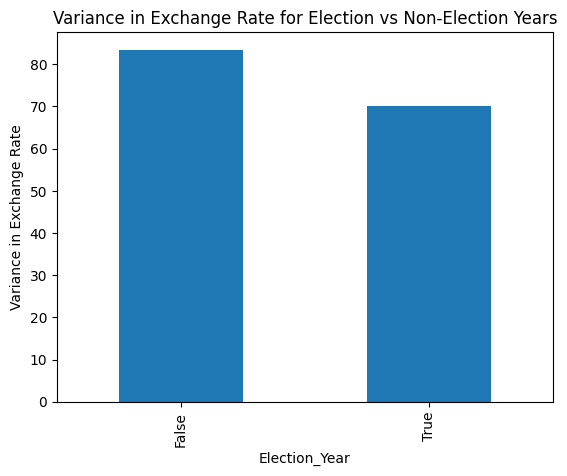

In [34]:
# Define the election years from 1996 to 2023
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]
# election_years = [1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]

# Filter for October 1st to November 30th in the Date column
df_filtered = df_renamed[(df_renamed.index.strftime('%m-%d') >= '10-01') &
                         (df_renamed.index.strftime('%m-%d') <= '11-30')]

# Add a column to identify whether the year is an election year or not
df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)

# Group by 'Election_Year' and calculate the standard deviation for each group
var_dev_by_group = df_filtered.groupby('Election_Year')['Exchange_Rate'].var()

# Display the standard deviations for election years and non-election years
display(var_dev_by_group)

# Add labels and title
plt.xlabel('Election Year')
plt.ylabel('Variance in Exchange Rate')
plt.title('Variance in Exchange Rate for Election vs Non-Election Years')


#plot in a bar chart
var_dev_by_group.plot(kind='bar')


<ipython-input-35-3ba313db91ac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)


,Exchange_Rate
Election_Year,
False,9.134574
True,8.366186


<Axes: title={'center': 'Standard Deviation in Exchange Rate for Election vs Non-Election Years'}, xlabel='Election_Year', ylabel='Standard Deviation in Exchange Rate'>

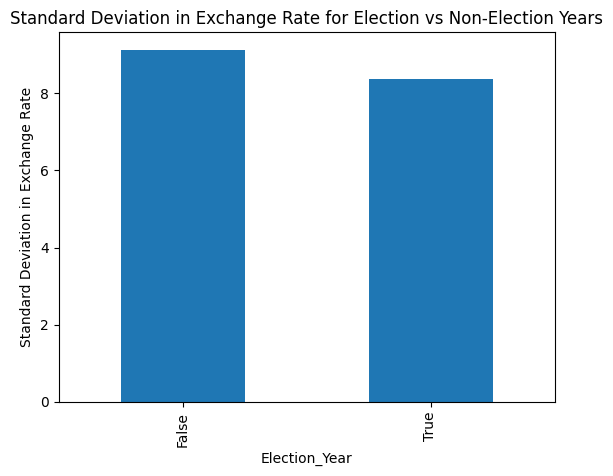

In [35]:
# Define the election years from 1996 to 2023
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]
# election_years = [1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]

# Filter for October 1st to November 30th in the Date column
df_filtered = df_renamed[(df_renamed.index.strftime('%m-%d') >= '10-01') &
                         (df_renamed.index.strftime('%m-%d') <= '11-30')]

# Add a column to identify whether the year is an election year or not
df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)

# Group by 'Election_Year' and calculate the standard deviation for each group
var_dev_by_group = df_filtered.groupby('Election_Year')['Exchange_Rate'].std()

# Display the standard deviations for election years and non-election years
display(var_dev_by_group)

# Add labels and title
plt.xlabel('Election Year')
plt.ylabel('Standard Deviation in Exchange Rate')
plt.title('Standard Deviation in Exchange Rate for Election vs Non-Election Years')


#plot in a bar chart
var_dev_by_group.plot(kind='bar')
